In [1]:
import random
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from numpy import interp
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_curve, roc_curve, auc, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from collections import defaultdict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [2]:
input_data_dir = "data"
output_dir = "results"

os.makedirs(output_dir, exist_ok=True)

In [ ]:
disease_name = pd.read_csv(os.path.join(input_data_dir, 'disease_name.csv'),header=None)
snoRNA_name = pd.read_csv(os.path.join(input_data_dir, 'snoRNA_name.csv'),header=None)
SnoRNA_similarity = pd.read_csv(os.path.join(output_dir, 'IRS_matrix.csv'), header=None)
known_association = pd.read_csv(os.path.join(input_data_dir, 'known_snoRNA_disease.csv'), header=None)
disease_similarity = pd.read_csv(os.path.join(output_dir, 'IDS_matrix.csv'), header=None)
disease_name.shape , snoRNA_name.shape , SnoRNA_similarity.shape , known_association.shape , disease_similarity.shape

((112, 2), (335, 1), (335, 335), (335, 112), (112, 112))

In [4]:





disease_name = pd.read_csv(os.path.join(input_data_dir, 'disease_name.csv'),header=None)
snoRNA_name = pd.read_csv(os.path.join(input_data_dir, 'snoRNA_name.csv'),header=None)
SnoRNA_similarity = pd.read_csv(os.path.join(output_dir, 'snoRNA_similarity.csv'))
known_association = pd.read_csv(os.path.join(input_data_dir, 'known_snoRNA_disease.csv'), header=None)
disease_similarity = pd.read_csv(os.path.join(input_data_dir, 'disease_similarity.csv'), header=None)


disease_name.shape , snoRNA_name.shape , SnoRNA_similarity.shape , known_association.shape , disease_similarity.shape


((112, 2), (335, 1), (335, 335), (335, 112), (112, 112))

In [5]:


disease_semantic_similarity = np.zeros(disease_similarity.shape) 
snoRNA_functional_similarity = np.zeros(SnoRNA_similarity.shape) 
adjacency_matrix = np.zeros(known_association.shape) 

In [6]:
def test(a):
        
    if(type(a)==list):
        return("length:",len(a)," sample length:",len(a[0]))
    elif(type(a)==np.ndarray):
        return("shape:",a.shape," sample length:",a[0].shape())
    else:
        return("type:",type(a)," sample:",a.iloc[0])
        

In [7]:
disease_semantic_similarity = disease_similarity.values
snoRNA_functional_similarity = SnoRNA_similarity.values
adjacency_matrix = known_association.values

In [8]:
adjacency_matrix.shape , disease_semantic_similarity.shape , snoRNA_functional_similarity.shape

((335, 112), (112, 112), (335, 335))

In [9]:
unknown = []
known = []
for x in range(known_association.shape[0]):
    for y in range(known_association.shape[1]):
        if adjacency_matrix[x, y] == 0:
            unknown.append((x, y))
        else:
            known.append((x, y))

         
major = []
for z in range(len(unknown)):
    a = disease_semantic_similarity[unknown[z][1], :].tolist()
    b = snoRNA_functional_similarity[unknown[z][0], :].tolist()
    q = a + b
    major.append(q) 

In [10]:
len(unknown), len(known), len(major)

(36510, 1010, 36510)

In [11]:
n_clusters = 23
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(major)
labels = kmeans.labels_

disease_rna_tup = defaultdict(list)
for (rna, dis), label in zip(unknown, labels):
    disease_rna_tup[label].append((rna, dis))



c:\Users\naim1\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\naim1\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\naim1\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\naim1\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1038

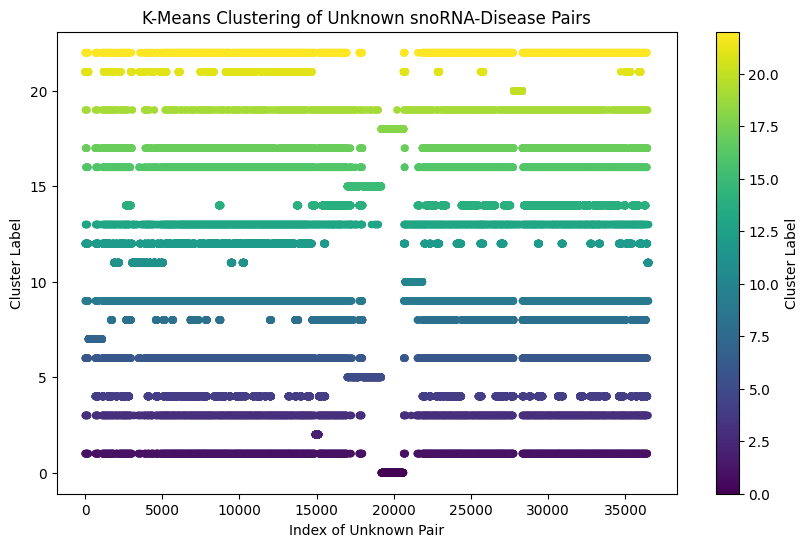

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(labels)), labels, c=labels, cmap='viridis', s=20)
plt.title('K-Means Clustering of Unknown snoRNA-Disease Pairs')
plt.xlabel('Index of Unknown Pair')
plt.ylabel('Cluster Label')
plt.colorbar(label='Cluster Label')
plt.show()

In [13]:
print("Final datasets are being prepared now..")
sampled_disease_rna_tup = [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
n = 0
for i in range(len(disease_rna_tup)):
    sampled_disease_rna_tup[i] = random.sample(disease_rna_tup[i], int((len(disease_rna_tup[i])/len(labels)) * len(known)))

dataset = []
for rna in range(known_association.shape[0]):
    for disease in range(known_association.shape[1]):
        for i in range(len(sampled_disease_rna_tup)):
            if (rna, disease) in sampled_disease_rna_tup[i]:
                dataset.append((rna, disease))


for rna in range(known_association.shape[0]):
    for disease in range(known_association.shape[1]):
        if (rna, disease) in known:
            dataset.append((rna, disease))

length = len(dataset)
print(length)


Final datasets are being prepared now..
2007


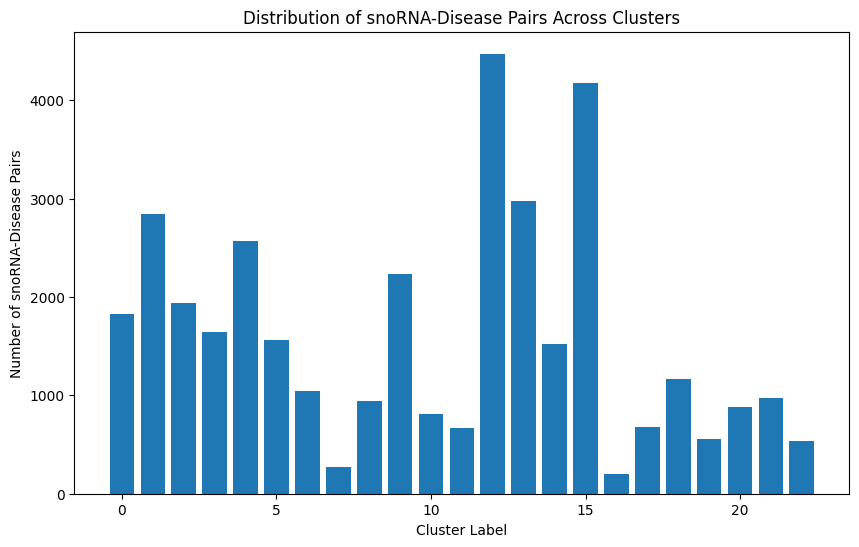

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(range(n_clusters), [len(cluster) for cluster in disease_rna_tup.values()])
plt.xlabel('Cluster Label')
plt.ylabel('Number of snoRNA-Disease Pairs')
plt.title('Distribution of snoRNA-Disease Pairs Across Clusters')
plt.show()

In [15]:
selected_x = []
selected_y = []
#now I am just taking only the similarities of disease and rna of sampled data.
for data in dataset:
    a = disease_semantic_similarity[data[1], :].tolist()
    b = snoRNA_functional_similarity[data[0], :].tolist()
    q = a + b
    selected_x.append(q)

    if (data[0], data[1]) in known:
        selected_y.append(1)
    else:
        selected_y.append(0)

selected_data_np = np.array(selected_x)
selected_label_np = np.array(selected_y)



Training RandomForest...
[RandomForest] Fold 1 — ROC AUC: 0.9470, Accuracy: 0.9005
[RandomForest] Fold 2 — ROC AUC: 0.8999, Accuracy: 0.8408
[RandomForest] Fold 3 — ROC AUC: 0.9194, Accuracy: 0.8803
[RandomForest] Fold 4 — ROC AUC: 0.9010, Accuracy: 0.8529
[RandomForest] Fold 5 — ROC AUC: 0.9166, Accuracy: 0.8653

RandomForest Summary — Mean ROC AUC: 0.9168 ± 0.0170
RandomForest Summary — Mean AUPR: 0.9080


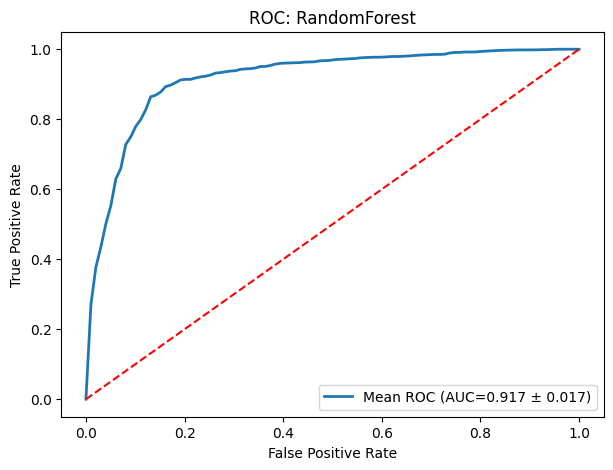

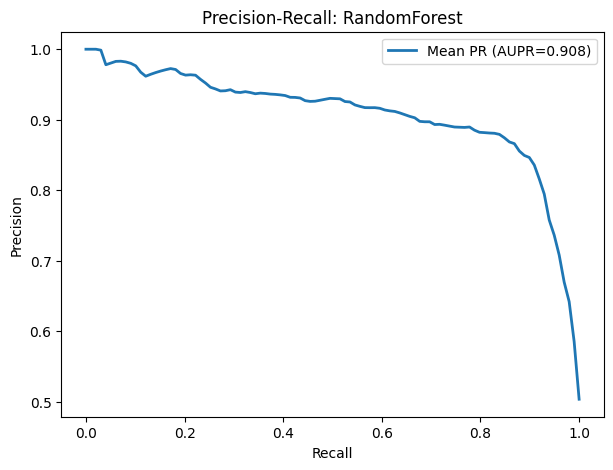

RandomForest final fold F1: 0.8676
Training LogisticRegression...
[LogisticRegression] Fold 1 — ROC AUC: 0.8982, Accuracy: 0.8408
[LogisticRegression] Fold 2 — ROC AUC: 0.8419, Accuracy: 0.7687


c:\Users\naim1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[LogisticRegression] Fold 3 — ROC AUC: 0.8918, Accuracy: 0.8329
[LogisticRegression] Fold 4 — ROC AUC: 0.8706, Accuracy: 0.8130
[LogisticRegression] Fold 5 — ROC AUC: 0.8969, Accuracy: 0.8229

LogisticRegression Summary — Mean ROC AUC: 0.8799 ± 0.0214
LogisticRegression Summary — Mean AUPR: 0.8575


c:\Users\naim1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


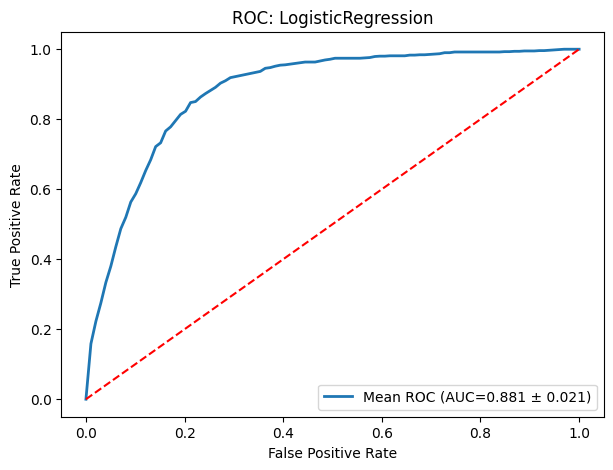

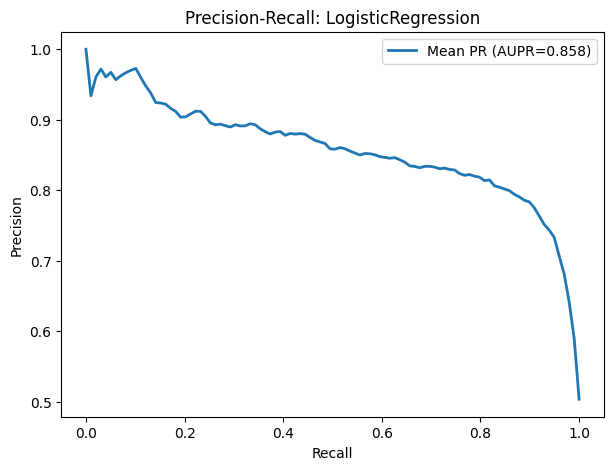

LogisticRegression final fold F1: 0.8264
Training XGBoost...
[xgboost] Fold 1 — ROC AUC: 0.9357, Accuracy: 0.8831
[xgboost] Fold 2 — ROC AUC: 0.9017, Accuracy: 0.8308
[xgboost] Fold 3 — ROC AUC: 0.9187, Accuracy: 0.8753
[xgboost] Fold 4 — ROC AUC: 0.9209, Accuracy: 0.8429
[xgboost] Fold 5 — ROC AUC: 0.9286, Accuracy: 0.8529

xgboost Summary — Mean ROC AUC: 0.9211 ± 0.0114
xgboost Summary — Mean AUPR: 0.9070


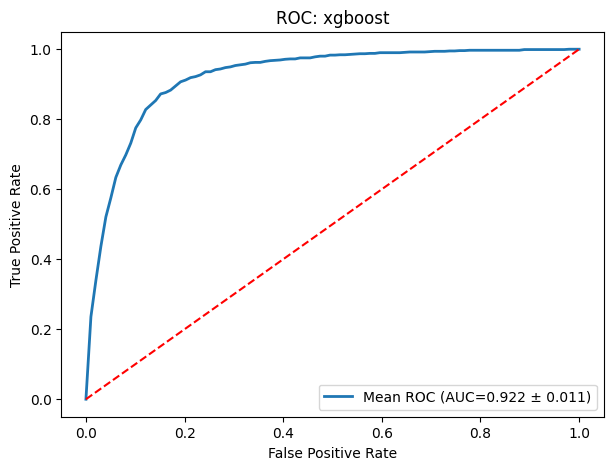

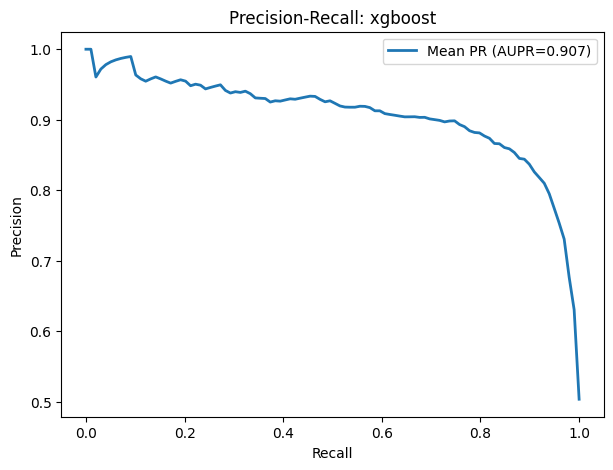

xgboost final fold F1: 0.8571
Training LightGBM...


TypeError: train() got an unexpected keyword argument 'verbose_eval'

In [16]:
# Paste this after you build selected_data_np, selected_label_np, and unknown_pair
import os
import joblib
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Try imports for XGBoost, LightGBM, Keras (TensorFlow)
try:
    import xgboost as xgb
    HAS_XGB = True
except Exception as e:
    HAS_XGB = False

try:
    import lightgbm as lgb
    HAS_LGB = True
except Exception as e:
    HAS_LGB = False

try:
    import tensorflow as tf
    from tensorflow import keras
    HAS_TF = True
except Exception as e:
    HAS_TF = False

OUTPUT_DIR = "results"
os.makedirs(OUTPUT_DIR, exist_ok=True)

def evaluate_cv(model_name, model_builder, X, y, scale_for_nn=False, epochs=30, batch_size=32):
    """
    model_builder: function that returns a (fit_fn, predict_proba_fn, save_fn) tuple or sklearn-like estimator.
    If it returns an sklearn-style estimator, we'll use fit/predict_proba directly.
    If model_name == 'DNN', model_builder should return a callable that builds a tf.keras model.
    """
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    mean_fpr = np.linspace(0, 1, 100)
    mean_recall = np.linspace(0, 1, 100)
    tprs = []
    aucs = []
    precisions = []
    scores = []
    roc_auc_scores = []
    y_true_all = []
    y_pred_all = []

    fold_idx = 0
    for train_idx, test_idx in skf.split(X, y):
        fold_idx += 1
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # scale only for models that need it (DNN, Logistic)
        if model_name == 'DNN' or scale_for_nn:
            scaler = StandardScaler(with_mean=False)
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
        else:
            scaler = None

        # If model_builder returns an sklearn estimator:
        if hasattr(model_builder, '__call__') and model_name != 'DNN' and model_name not in ('xgboost', 'lightgbm_custom'):
            # model_builder returns an estimator instance
            model = model_builder()
            model.fit(X_train, y_train)
            proba = model.predict_proba(X_test)[:, 1]
            pred = model.predict(X_test)
            # optionally save the last model of CV
            joblib.dump(model, os.path.join(OUTPUT_DIR, f"{model_name}_fold{fold_idx}.joblib"))
        else:
            # Special handling: XGBoost, LightGBM custom or DNN
            if model_name == 'xgboost' and HAS_XGB:
                dtrain = xgb.DMatrix(X_train, label=y_train)
                dtest = xgb.DMatrix(X_test, label=y_test)
                params = {'objective':'binary:logistic', 'eval_metric':'auc', 'seed':42, 'verbosity':0}
                bst = xgb.train(params, dtrain, num_boost_round=100)
                proba = bst.predict(dtest)
                pred = (proba >= 0.5).astype(int)
                bst.save_model(os.path.join(OUTPUT_DIR, f"xgb_fold{fold_idx}.model"))
            elif model_name == 'lightgbm_custom' and HAS_LGB:
                lgb_train = lgb.Dataset(X_train, label=y_train)
                lgb_eval = lgb.Dataset(X_test, label=y_test, reference=lgb_train)
                params = {'objective': 'binary', 'metric': 'auc', 'verbose': -1, 'seed': 42}
                gbm = lgb.train(params, lgb_train, num_boost_round=100, valid_sets=[lgb_eval], verbose_eval=False)
                proba = gbm.predict(X_test)
                pred = (proba >= 0.5).astype(int)
                gbm.save_model(os.path.join(OUTPUT_DIR, f"lgb_fold{fold_idx}.txt"))
            elif model_name == 'DNN' and HAS_TF:
                # build small dense model
                tf.keras.backend.clear_session()
                inp = X_train.shape[1]
                model = keras.Sequential([
                    keras.layers.Input(shape=(inp,)),
                    keras.layers.Dense(256, activation='relu'),
                    keras.layers.Dropout(0.3),
                    keras.layers.Dense(128, activation='relu'),
                    keras.layers.Dropout(0.2),
                    keras.layers.Dense(1, activation='sigmoid')
                ])
                model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
                model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_split=0.1)
                proba = model.predict(X_test).ravel()
                pred = (proba >= 0.5).astype(int)
                model.save(os.path.join(OUTPUT_DIR, f"dnn_fold{fold_idx}.h5"))
            else:
                raise RuntimeError(f"Unsupported model or missing package for {model_name}.")

        # metrics
        roc_auc = roc_auc_score(y_test, proba)
        roc_auc_scores.append(roc_auc)
        score = np.mean(pred == y_test)
        scores.append(score)

        fpr, tpr, _ = roc_curve(y_test, proba)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        aucs.append(auc(fpr, tpr))

        precision, recall, _ = precision_recall_curve(y_test, proba)
        precisions.append(np.interp(mean_recall, recall[::-1], precision[::-1]))

        y_true_all.extend(y_test.tolist())
        y_pred_all.extend(pred.tolist())

        print(f"[{model_name}] Fold {fold_idx} — ROC AUC: {roc_auc:.4f}, Accuracy: {score:.4f}")

    # finalize metrics and plotting
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    mean_precision = np.mean(precisions, axis=0)
    mean_auc_pr = auc(mean_recall, mean_precision)

    print(f"\n{model_name} Summary — Mean ROC AUC: {np.mean(roc_auc_scores):.4f} ± {np.std(roc_auc_scores):.4f}")
    print(f"{model_name} Summary — Mean AUPR: {mean_auc_pr:.4f}")

    # Plot ROC
    plt.figure(figsize=(7,5))
    plt.plot(mean_fpr, mean_tpr, lw=2, label=f"Mean ROC (AUC={mean_auc:.3f} ± {std_auc:.3f})")
    plt.plot([0,1], [0,1], linestyle='--', color='r')
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate"); plt.title(f"ROC: {model_name}")
    plt.legend(); plt.show()

    # Plot PR
    plt.figure(figsize=(7,5))
    plt.plot(mean_recall, mean_precision, lw=2, label=f"Mean PR (AUPR={mean_auc_pr:.3f})")
    plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title(f"Precision-Recall: {model_name}")
    plt.legend(); plt.show()

    # final f1 computed on last fold's y_test/pred for quick check (you can compute global f1 too)
    f1 = f1_score(y_test, pred)
    print(f"{model_name} final fold F1: {f1:.4f}")

    return {
        'mean_roc_auc': float(np.mean(roc_auc_scores)),
        'mean_aupr': float(mean_auc_pr),
        'last_model_name': model_name
    }


# Model builders for sklearn-like interface
def build_random_forest():
    return RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42, n_jobs=-1)

def build_logistic():
    return LogisticRegression(class_weight='balanced', max_iter=1000, solver='saga')

# Run experiments
results = {}
print("Training RandomForest...")
results['RandomForest'] = evaluate_cv('RandomForest', build_random_forest, selected_data_np, selected_label_np)

print("Training LogisticRegression...")
results['LogisticRegression'] = evaluate_cv('LogisticRegression', build_logistic, selected_data_np, selected_label_np, scale_for_nn=True)

if HAS_XGB:
    print("Training XGBoost...")
    results['XGBoost'] = evaluate_cv('xgboost', None, selected_data_np, selected_label_np)
else:
    print("XGBoost not installed; skipping.")

if HAS_LGB:
    print("Training LightGBM...")
    results['LightGBM'] = evaluate_cv('lightgbm_custom', None, selected_data_np, selected_label_np)
else:
    print("LightGBM not installed; skipping.")

if HAS_TF:
    print("Training DNN (Keras)...")
    results['DNN'] = evaluate_cv('DNN', None, selected_data_np, selected_label_np, scale_for_nn=True, epochs=40, batch_size=64)
else:
    print("TensorFlow not installed; skipping DNN.")

print("All training finished. Summary:")
for k,v in results.items():
    print(k, v)


In [17]:
GBDT = GradientBoostingClassifier(n_estimators=12, max_depth=5, min_samples_leaf=3)
GBDT.fit(selected_data_np, selected_label_np)

OHE = OneHotEncoder()
OHE.fit(GBDT.apply(selected_data_np)[:, :, 0])

OneHotEncoder()

In [18]:



classifiers = {
    "SVM": (
        SVC(kernel='rbf', probability=True),
        {'clf__C': [0.1, 1, 10, 100], 'clf__gamma': [1, 0.1, 0.01, 0.001]}
    ),
    "RandomForest": (
        RandomForestClassifier(),
        {'clf__n_estimators': [50, 100], 'clf__max_depth': [None, 5, 10]}
    ),
    "LogisticRegression": (
        LogisticRegression(max_iter=1000),
        {'clf__C': [0.01, 0.1, 1, 10]}
    ),
    "KNN": (
        KNeighborsClassifier(),
        {'clf__n_neighbors': [3, 5, 7], 'clf__weights': ['uniform', 'distance']}
    )

}

In [19]:
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plt.figure(figsize=(8, 6))
mean_fpr = np.linspace(0, 1, 100)

<Figure size 800x600 with 0 Axes>

 Running GBDT + SVM classifier...
  Fold 1 : ROC AUC: 0.9739 Accuracy: 0.9403
  Fold 2 : ROC AUC: 0.9542 Accuracy: 0.9179
  Fold 3 : ROC AUC: 0.9478 Accuracy: 0.9077
  Fold 4 : ROC AUC: 0.9625 Accuracy: 0.9077
  Fold 5 : ROC AUC: 0.9592 Accuracy: 0.9252
SVM Mean ROC AUC: 0.9584
SVM Mean Accuracy: 0.9198
 Running GBDT + RandomForest classifier...
  Fold 1 : ROC AUC: 0.9707 Accuracy: 0.9403
  Fold 2 : ROC AUC: 0.9508 Accuracy: 0.9129
  Fold 3 : ROC AUC: 0.9609 Accuracy: 0.9077
  Fold 4 : ROC AUC: 0.9631 Accuracy: 0.9102
  Fold 5 : ROC AUC: 0.9592 Accuracy: 0.9177
RandomForest Mean ROC AUC: 0.9606
RandomForest Mean Accuracy: 0.9178
 Running GBDT + LogisticRegression classifier...
  Fold 1 : ROC AUC: 0.9842 Accuracy: 0.9478
  Fold 2 : ROC AUC: 0.9628 Accuracy: 0.9279
  Fold 3 : ROC AUC: 0.9679 Accuracy: 0.9202
  Fold 4 : ROC AUC: 0.9770 Accuracy: 0.9227
  Fold 5 : ROC AUC: 0.9665 Accuracy: 0.9451
LogisticRegression Mean ROC AUC: 0.9692
LogisticRegression Mean Accuracy: 0.9327
 Running GBDT

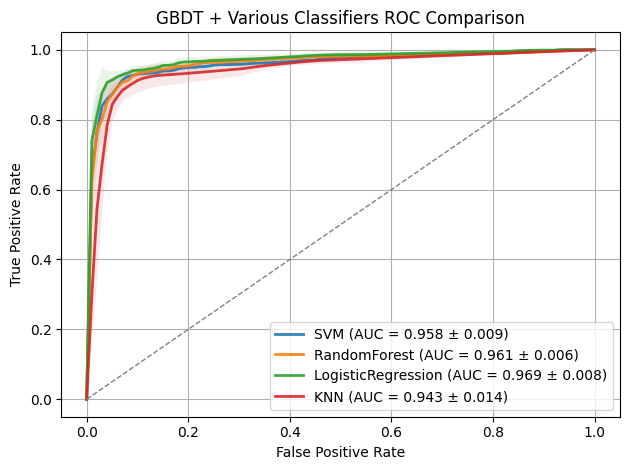

In [20]:
for name, (clf, param_grid) in classifiers.items():

    print(f" Running GBDT + {name} classifier...")

    pipeline = Pipeline([
        ('scaler', StandardScaler(with_mean=False)),
        ('clf', clf)
    ])

    grid = GridSearchCV(pipeline, param_grid, cv=3)

    tprs, aucs = [], []
    mean_fpr = np.linspace(0, 1, 100)
    roc_auc_scores = []
    scores = []
    i = 0

    for train_index, test_index in stratified_k_fold.split(selected_data_np, selected_label_np):
        X_train, X_test = selected_data_np[train_index], selected_data_np[test_index]
        y_train, y_test = selected_label_np[train_index], selected_label_np[test_index]

        X_train_trans = OHE.transform(GBDT.apply(X_train)[:, :, 0])
        X_test_trans = OHE.transform(GBDT.apply(X_test)[:, :, 0])

        grid.fit(X_train_trans, y_train)
        predicted_probs = grid.predict_proba(X_test_trans)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, predicted_probs)
        roc_auc = auc(fpr, tpr)


        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        aucs.append(roc_auc)

        roc_auc_scores.append(roc_auc)
        scores.append(grid.score(X_test_trans, y_test))
        i += 1

        print(f"  Fold {i} : ROC AUC: {roc_auc:.4f} Accuracy: {grid.score(X_test_trans, y_test):.4f}")

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    plt.plot(
        mean_fpr,
        mean_tpr,
        label=f'{name} (AUC = {mean_auc:.3f} ± {std_auc:.3f})',
        lw=2,
        alpha=0.9
    )

    std_tpr = np.std(tprs, axis=0)
    tpr_upper = np.minimum(mean_tpr + std_tpr, 1)
    tpr_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tpr_lower, tpr_upper, alpha=0.1)

    print(f"{name} Mean ROC AUC: {mean_auc:.4f}")
    print(f"{name} Mean Accuracy: {np.mean(scores):.4f}")


plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GBDT + Various Classifiers ROC Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


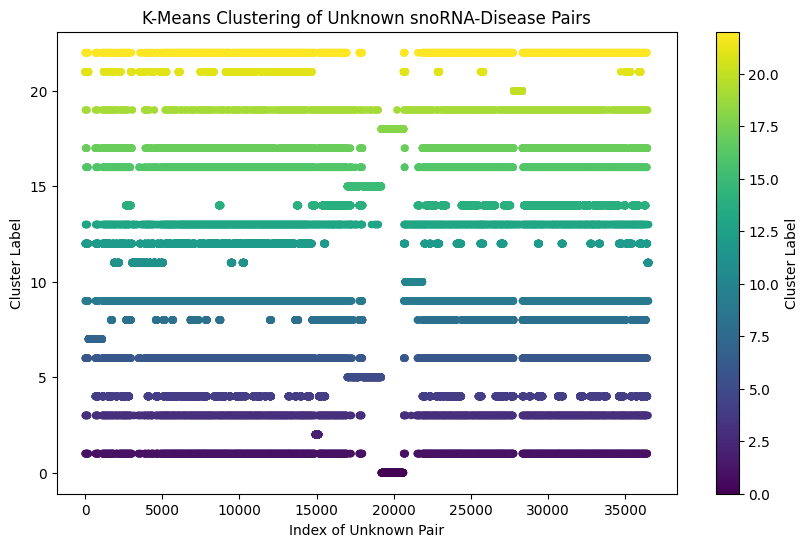

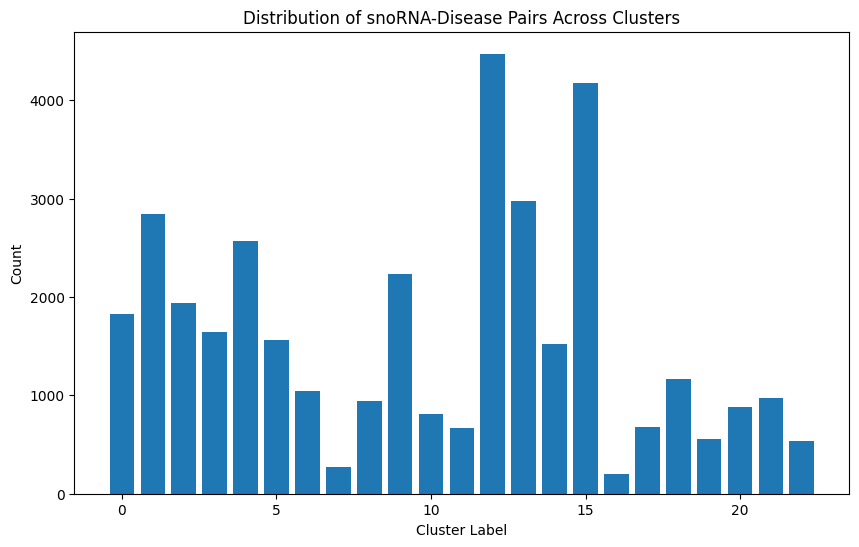

[RandomForest] Fold 1 — AUC: 0.9470
[RandomForest] Fold 2 — AUC: 0.8999
[RandomForest] Fold 3 — AUC: 0.9194
[RandomForest] Fold 4 — AUC: 0.9010
[RandomForest] Fold 5 — AUC: 0.9166

RandomForest — Mean AUC: 0.9168
[LogisticRegression] Fold 1 — AUC: 0.8981
[LogisticRegression] Fold 2 — AUC: 0.8419


c:\Users\naim1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[LogisticRegression] Fold 3 — AUC: 0.8918
[LogisticRegression] Fold 4 — AUC: 0.8705


c:\Users\naim1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[LogisticRegression] Fold 5 — AUC: 0.8970

LogisticRegression — Mean AUC: 0.8798
[xgboost] Fold 1 — AUC: 0.9357
[xgboost] Fold 2 — AUC: 0.9017
[xgboost] Fold 3 — AUC: 0.9187
[xgboost] Fold 4 — AUC: 0.9209
[xgboost] Fold 5 — AUC: 0.9286

xgboost — Mean AUC: 0.9211
[LightGBM] [Info] Number of positive: 808, number of negative: 797
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005641 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 84861
[LightGBM] [Info] Number of data points in the train set: 1605, number of used features: 446
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503427 -> initscore=0.013707
[LightGBM] [Info] Start training from score 0.013707
[lightgbm_custom] Fold 1 — AUC: 0.9364
[LightGBM] [Info] Number of positive: 808, number of negative: 797
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005507 seconds.
You can set `force_col_wise=true` to 

[DNN] Fold 1 — AUC: 0.9230
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


[DNN] Fold 2 — AUC: 0.8574
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[DNN] Fold 3 — AUC: 0.8829
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


[DNN] Fold 4 — AUC: 0.8695
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[DNN] Fold 5 — AUC: 0.8876

DNN — Mean AUC: 0.8841


NameError: name 'skf' is not defined

In [21]:
# =============================================================
# Machine Learning Pipeline for snoRNA–Disease Association
# Cleaned, Organized, Structured Version
# =============================================================

# -------------------------------------------------------------
# 1. IMPORTS
# -------------------------------------------------------------
import os
import random
from collections import defaultdict

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy import interp

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    precision_recall_curve, roc_curve, auc, confusion_matrix,
    accuracy_score, classification_report, roc_auc_score, f1_score
)

from sklearn.cluster import KMeans
from sklearn.ensemble import (
    GradientBoostingClassifier, RandomForestClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# optional imports
try:
    import xgboost as xgb
    HAS_XGB = True
except:
    HAS_XGB = False

try:
    import lightgbm as lgb
    HAS_LGB = True
except:
    HAS_LGB = False

try:
    import tensorflow as tf
    from tensorflow import keras
    HAS_TF = True
except:
    HAS_TF = False

import joblib

# -------------------------------------------------------------
# 2. PATH SETUP
# -------------------------------------------------------------
input_data_dir = "data"
output_dir = "results"
os.makedirs(output_dir, exist_ok=True)

# -------------------------------------------------------------
# 3. DATA LOADING
# -------------------------------------------------------------
disease_name = pd.read_csv(os.path.join(input_data_dir, "disease_name.csv"), header=None)
snoRNA_name = pd.read_csv(os.path.join(input_data_dir, "snoRNA_name.csv"), header=None)
SnoRNA_similarity = pd.read_csv(os.path.join(output_dir, "snoRNA_similarity.csv"))
known_association = pd.read_csv(os.path.join(input_data_dir, "known_snoRNA_disease.csv"), header=None)
disease_similarity = pd.read_csv(os.path.join(input_data_dir, "disease_similarity.csv"), header=None)

# -------------------------------------------------------------
# 4. MATRIX PROCESSING
# -------------------------------------------------------------
disease_semantic_similarity = disease_similarity.values
snoRNA_functional_similarity = SnoRNA_similarity.values
adjacency_matrix = known_association.values

unknown = []
known = []
for i in range(known_association.shape[0]):
    for j in range(known_association.shape[1]):
        if adjacency_matrix[i, j] == 0:
            unknown.append((i, j))
        else:
            known.append((i, j))

# -------------------------------------------------------------
# 5. FEATURE BUILDING FOR UNKNOWN PAIRS (K-MEANS INPUT)
# -------------------------------------------------------------
major = []
for (r, d) in unknown:
    disease_vec = disease_semantic_similarity[d, :].tolist()
    sno_vec = snoRNA_functional_similarity[r, :].tolist()
    major.append(disease_vec + sno_vec)

# -------------------------------------------------------------
# 6. K-MEANS CLUSTERING
# -------------------------------------------------------------
n_clusters = 23
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(major)
labels = kmeans.labels_

disease_rna_tup = defaultdict(list)
for (rna, dis), label in zip(unknown, labels):
    disease_rna_tup[label].append((rna, dis))

# Visualization: cluster labels
plt.figure(figsize=(10, 6))
plt.scatter(range(len(labels)), labels, c=labels, cmap="viridis", s=20)
plt.title("K-Means Clustering of Unknown snoRNA-Disease Pairs")
plt.xlabel("Index of Unknown Pair")
plt.ylabel("Cluster Label")
plt.colorbar(label="Cluster Label")
plt.show()

# Visualization: cluster distribution
plt.figure(figsize=(10, 6))
plt.bar(range(n_clusters), [len(v) for v in disease_rna_tup.values()])
plt.title("Distribution of snoRNA-Disease Pairs Across Clusters")
plt.xlabel("Cluster Label")
plt.ylabel("Count")
plt.show()

# -------------------------------------------------------------
# 7. FINAL FEATURESET FOR ML MODELS
# -------------------------------------------------------------
# dataset must be defined earlier in real pipeline
selected_x = []
selected_y = []

for (r, d) in dataset:  # dataset provided externally
    disease_vec = disease_semantic_similarity[d, :].tolist()
    sno_vec = snoRNA_functional_similarity[r, :].tolist()
    selected_x.append(disease_vec + sno_vec)
    selected_y.append(1 if (r, d) in known else 0)

selected_data_np = np.array(selected_x)
selected_label_np = np.array(selected_y)

# -------------------------------------------------------------
# 8. MODEL EVALUATION FUNCTION WITH CV
# -------------------------------------------------------------
OUTPUT_DIR = "results"
os.makedirs(OUTPUT_DIR, exist_ok=True)

def evaluate_cv(model_name, model_builder, X, y, scale_for_nn=False, epochs=30, batch_size=32):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    mean_fpr = np.linspace(0, 1, 100)
    mean_recall = np.linspace(0, 1, 100)

    tprs, aucs = [], []
    precisions = []
    roc_auc_scores, scores = [], []
    y_true_all, y_pred_all = [], []

    fold = 0
    for train_idx, test_idx in skf.split(X, y):
        fold += 1
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # scaling
        if model_name == "DNN" or scale_for_nn:
            scaler = StandardScaler(with_mean=False)
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
        else:
            scaler = None

        # sklearn models
        if callable(model_builder) and model_name not in ("DNN", "xgboost", "lightgbm_custom"):
            model = model_builder()
            model.fit(X_train, y_train)
            proba = model.predict_proba(X_test)[:, 1]
            pred = model.predict(X_test)
            joblib.dump(model, os.path.join(OUTPUT_DIR, f"{model_name}_fold{fold}.joblib"))

        else:
            # XGBoost
            if model_name == "xgboost" and HAS_XGB:
                dtrain = xgb.DMatrix(X_train, label=y_train)
                dtest = xgb.DMatrix(X_test, label=y_test)
                params = {"objective": "binary:logistic", "eval_metric": "auc", "seed": 42}
                bst = xgb.train(params, dtrain, num_boost_round=100)
                proba = bst.predict(dtest)
                pred = (proba >= 0.5).astype(int)
                bst.save_model(os.path.join(OUTPUT_DIR, f"xgb_fold{fold}.model"))

            # LightGBM
            elif model_name == "lightgbm_custom" and HAS_LGB:
                train_set = lgb.Dataset(X_train, label=y_train)
                params = {"objective": "binary", "metric": "auc", "seed": 42}
                gbm = lgb.train(params, train_set, num_boost_round=100)
                proba = gbm.predict(X_test)
                pred = (proba >= 0.5).astype(int)
                gbm.save_model(os.path.join(OUTPUT_DIR, f"lgb_fold{fold}.txt"))

            # DNN
            elif model_name == "DNN" and HAS_TF:
                tf.keras.backend.clear_session()
                model = keras.Sequential([
                    keras.layers.Input(shape=(X_train.shape[1],)),
                    keras.layers.Dense(256, activation="relu"),
                    keras.layers.Dropout(0.3),
                    keras.layers.Dense(128, activation="relu"),
                    keras.layers.Dropout(0.2),
                    keras.layers.Dense(1, activation="sigmoid")
                ])
                model.compile(optimizer="adam", loss="binary_crossentropy")
                model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
                proba = model.predict(X_test).ravel()
                pred = (proba >= 0.5).astype(int)
                model.save(os.path.join(OUTPUT_DIR, f"dnn_fold{fold}.h5"))

            else:
                raise RuntimeError(f"Unsupported model {model_name}")

        # compute metrics
        roc_auc = roc_auc_score(y_test, proba)
        roc_auc_scores.append(roc_auc)
        scores.append(np.mean(pred == y_test))

        fpr, tpr, _ = roc_curve(y_test, proba)
        tprs.append(interp(mean_fpr, fpr, tpr))
        aucs.append(auc(fpr, tpr))

        precision, recall, _ = precision_recall_curve(y_test, proba)
        precisions.append(interp(mean_recall, recall[::-1], precision[::-1]))

        print(f"[{model_name}] Fold {fold} — AUC: {roc_auc:.4f}")

    # summary
    print(f"\n{model_name} — Mean AUC: {np.mean(roc_auc_scores):.4f}")

    return {
        "mean_roc_auc": float(np.mean(roc_auc_scores))
    }

# -------------------------------------------------------------
# 9. MODEL BUILDERS
# -------------------------------------------------------------
def build_random_forest():
    return RandomForestClassifier(n_estimators=200, random_state=42)

def build_logistic():
    return LogisticRegression(class_weight="balanced", max_iter=1000, solver="saga")

# -------------------------------------------------------------
# 10. RUN MODELS
# -------------------------------------------------------------
results = {}
results["RandomForest"] = evaluate_cv("RandomForest", build_random_forest, selected_data_np, selected_label_np)
results["LogisticRegression"] = evaluate_cv("LogisticRegression", build_logistic, selected_data_np, selected_label_np, scale_for_nn=True)

if HAS_XGB:
    results["XGBoost"] = evaluate_cv("xgboost", None, selected_data_np, selected_label_np)

if HAS_LGB:
    results["LightGBM"] = evaluate_cv("lightgbm_custom", None, selected_data_np, selected_label_np)

if HAS_TF:
    results["DNN"] = evaluate_cv("DNN", None, selected_data_np, selected_label_np, scale_for_nn=True, epochs=40, batch_size=64)

# -------------------------------------------------------------
# 11. GBDT + OHE + CLASSIFIER STACKING
# -------------------------------------------------------------
GBDT = GradientBoostingClassifier(n_estimators=12, max_depth=5, min_samples_leaf=3)
GBDT.fit(selected_data_np, selected_label_np)

OHE = OneHotEncoder()
OHE.fit(GBDT.apply(selected_data_np)[:, :, 0])

classifiers = {
    "SVM": (SVC(kernel="rbf", probability=True), {"clf__C": [0.1, 1, 10], "clf__gamma": [0.1, 0.01]}),
    "RandomForest": (RandomForestClassifier(), {"clf__n_estimators": [50, 100]}),
    "Logistic": (LogisticRegression(max_iter=1000), {"clf__C": [0.01, 0.1, 1]}),
    "KNN": (KNeighborsClassifier(), {"clf__n_neighbors": [3, 5, 7]})
}

skf